In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [83]:
df = pd.read_csv("df_preprocessed.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason_1                   700 non-null    int64  
 1   Reason_2                   700 non-null    int64  
 2   Reason_3                   700 non-null    int64  
 3   Reason_4                   700 non-null    int64  
 4   Month Value                700 non-null    int64  
 5   Day of the Week            700 non-null    int64  
 6   Transportation Expense     700 non-null    int64  
 7   Distance to Work           700 non-null    int64  
 8   Age                        700 non-null    int64  
 9   Daily Work Load Average    700 non-null    float64
 10  Body Mass Index            700 non-null    int64  
 11  Education                  700 non-null    int64  
 12  Children                   700 non-null    int64  
 13  Pets                       700 non-null    int64  

In [87]:
df['Attendance_Status'] = df['Absenteeism Time in Hours'].apply(lambda x: 1 if x > 0 else 0)
print(df['Attendance_Status'])

0      1
1      0
2      1
3      1
4      1
      ..
695    1
696    1
697    1
698    1
699    1
Name: Attendance_Status, Length: 700, dtype: int64


In [89]:
features = [
    'Distance to Work',
    'Transportation Expense',
    'Age',
    'Daily Work Load Average',
    'Body Mass Index',
    'Education',
    'Children',
    'Pets',
    'Day of the Week'
]

X = df[features]
y = df['Attendance_Status']


In [103]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, stratify=y, random_state=42
)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_final = pd.DataFrame(X_train_sm, columns=X.columns)
X_test_final = pd.DataFrame(X_test, columns=X.columns)
y_train_final=pd.DataFrame(y_train_sm)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)
sample_scaled = scaler.transform(sample)

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train_sm)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [127]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf.fit(X_train_final, y_train_final)
y_pred_rf = rf.predict(X_test_final)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_final, y_train_final)
y_pred_lr = lr.predict(X_test_final)

print(" Classification Report – Random Forest:\n")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print(" Classification Report – Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr, zero_division=0))
sample = pd.DataFrame([{
    'Distance to Work': 111111111,
    'Transportation Expense': 1,
    'Age':35,
    'Daily Work Load Average': 12,
    'Body Mass Index': 15,
    'Education': 1,
    'Children': 1,
    'Pets': 0,
    'Day of the Week': 2
}])

# Predict with the Random Forest model
prediction = rf.predict(sample)

# Interpret result
print("Prediction:", "Absent" if prediction[0] == 1 else "Present")
proba = rf.predict_proba(sample)
print(f"Probability - Present: {proba[0][0]:.2f}, Absent: {proba[0][1]:.2f}")


C:\Users\ilaba\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 Classification Report – Random Forest:

              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.96      0.95      0.96       132

    accuracy                           0.92       140
   macro avg       0.65      0.66      0.66       140
weighted avg       0.93      0.92      0.92       140

 Classification Report – Logistic Regression:

              precision    recall  f1-score   support

           0       0.11      0.62      0.18         8
           1       0.97      0.68      0.80       132

    accuracy                           0.68       140
   macro avg       0.54      0.65      0.49       140
weighted avg       0.92      0.68      0.76       140

Prediction: Absent
Probability - Present: 0.32, Absent: 0.68


C:\Users\ilaba\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\ilaba\AppData\Local\Temp\ipykernel_16768\1054125788.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ilaba\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


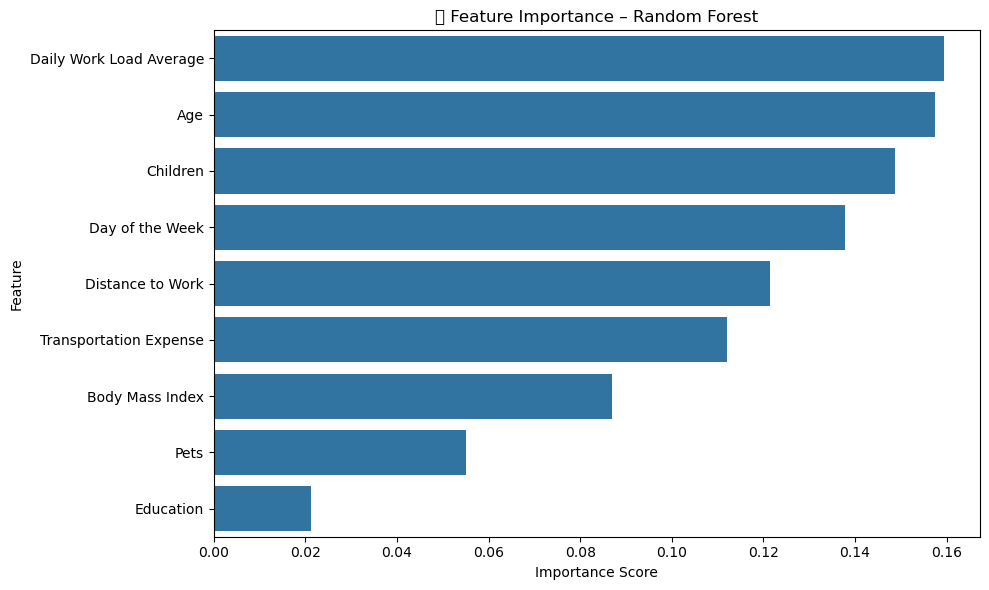

In [99]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('🔍 Feature Importance – Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [101]:
sample = pd.DataFrame([{
    'Distance to Work': 20,
    'Transportation Expense': 150,
    'Age': 35,
    'Daily Work Load Average': 250,
    'Body Mass Index': 28,
    'Education': 1,
    'Children': 2,
    'Pets': 1,
    'Day of the Week': 3
}])
print("Will be absent?" if rf.predict(sample)[0] else "Will be present")


Will be absent?


C:\Users\ilaba\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
